# Authorship of the Federalist Papers

The _Federalist Papers_ were a set of 85 essays published between 1787 and 1788 to promote the ratification of the United States Constitution. They were originally published under the pseudonym "Publius". Although the identity of the authors was a closely guarded secret at the time, most of the papers have since been conclusively attributed to one of Hamilton, Jay, or Madison. The known authorships can be found in `/data301/data/federalist/authorship.csv`.

For 15 of the papers, however, the authorships remain disputed. (These papers can be identified from the `authorship.csv` file because the "Author" field is blank.) In this analysis, you will train a classifier on the papers with known authorships and use your classifier to predict the authorships of the disputed papers. The text of each paper can be found in the `/data301/data/federalist/` directory. The name of the file indicates the number of the paper.

## Question 1

When analyzing an author's style, common words like "the" and "on" are actually more useful than rare words like "hostilities". That is because rare words typically signify context. Context is useful if you are trying to find documents about similar topics, but not so useful if you are trying to identify an author's style because different authors can write about the same topic. For example, both Dr. Seuss and Charles Dickens used rare words like "chimney" and "stockings" in _How the Grinch Stole Christmas_ and _A Christmas Carol_, respectively. But they used common words very differently: Dickens used the word "upon" over 100 times, while Dr. Seuss did not use "upon" at all.

Read in the Federalist Papers. Convert each one into a vector of term frequencies. In order to restrict to common words, include only the top 50 words. Then, train a $k$-nearest neighbors model on the documents with known authorship. Determine an optimal value of $k$ (it's up to you to decide what's "optimal"). 

Report an estimate of the test accuracy, precision, and recall of your model.

In [1]:
# TYPE YOUR CODE HERE.
%matplotlib inline
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#try both vectorizers
authors = pd.read_csv("/data301/data/federalist/authorship.csv")

rows = []
vec = TfidfVectorizer(norm=None)
for i in range(1, 86):
    article = "/data301/data/federalist/" + str(i) + ".txt"
    row = {}
    row["text"] = open(article).read()
    rows.append(row)

papers_pd = pd.DataFrame(rows)           


In [2]:
papers_pd.head()

,text
0,To the People of the State of New York:\n\nAFT...
1,To the People of the State of New York:\n\nWHE...
2,To the People of the State of New York:\n\nIT ...
3,To the People of the State of New York:\n\nMY ...
4,To the People of the State of New York:\n\nQUE...


In [3]:
papers_pd["Author"] = authors["Author"]

In [4]:
papers_pd=papers_pd.fillna("None")

In [5]:
papers_pd

,text,Author
0,To the People of the State of New York:\n\nAFT...,Hamilton
1,To the People of the State of New York:\n\nWHE...,Jay
2,To the People of the State of New York:\n\nIT ...,Jay
3,To the People of the State of New York:\n\nMY ...,Jay
4,To the People of the State of New York:\n\nQUE...,Jay
5,To the People of the State of New York:\n\nTHE...,Hamilton
6,To the People of the State of New York:\n\nIT ...,Hamilton
7,To the People of the State of New York:\n\nASS...,Hamilton
8,To the People of the State of New York:\n\nA F...,Hamilton
9,To the People of the State of New York:\n\nAMO...,Madison


Creates the known author dataframe and the unknown author dataframe.

In [6]:
Known = papers_pd[papers_pd["Author"] != "None"]
Unknown = papers_pd[papers_pd["Author"] == "None"]

I know this isn't the most effective approach, But I looked all over the internet and could nota short hand scikit learn way to find the top 50 most frequent words in the corpus. In the end I just used some for loops and accessing the dictionary so that I could use the top fifty words in my model.

In [7]:
vec = CountVectorizer()
vec.fit(Known["text"])
X_train_dict = vec.transform(Known["text"])
mydict = {}
for i, yuh in enumerate(sorted(vec.vocabulary_)):
    mydict[yuh] = X_train_dict.sum(axis=0).tolist()[0][i]


In [8]:
keys = []
for combo in mydict:
    if len(keys) < 50:
        keys.append(combo)
    else: 
        for i, item in enumerate(keys):
            if mydict.get(combo) > mydict.get(item):
                keys[i] = combo
                break

Here is a list of my top 50 words.

In [9]:
keys

['the',
 'to',
 'that',
 'which',
 'would',
 'will',
 'with',
 'state',
 'more',
 'than',
 'them',
 'those',
 'we',
 'who',
 'was',
 'were',
 'us',
 'what',
 'without',
 'when',
 'york',
 'war',
 'whole',
 'yet',
 'trial',
 'view',
 'within',
 'whose',
 'truth',
 'support',
 'whatever',
 'whom',
 'said',
 'second',
 'use',
 'views',
 'taken',
 'taxation',
 'able',
 'taxes',
 'trust',
 'weight',
 'years',
 'through',
 'you',
 'various',
 'wholly',
 'world',
 'success',
 'thirteen']

In [10]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

X_train = Known.drop(columns = "Author")
Y_train = Known["Author"]

vec = CountVectorizer(vocabulary=keys)
vec.fit(Known["text"])
X_train_dict = vec.transform(Known["text"])
def get_accuracy_k(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_dict, Y_train)
    return cross_val_score(model,X_train_dict, Y_train,\
                           cv=5, scoring='accuracy').mean()
def get_recall_k(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_dict, Y_train)
    y_train_pred = model.predict(X_train_dict)
    return (recall_score(Y_train, y_train_pred, average = 'micro') +\
           recall_score(Y_train, y_train_pred, average = 'micro') +\
           recall_score(Y_train, y_train_pred, average = 'micro'))/3
def get_precision_k(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_dict, Y_train)
    y_train_pred = model.predict(X_train_dict)
    return (precision_score(Y_train, y_train_pred, average = 'micro') +\
           precision_score(Y_train, y_train_pred, average = 'micro') +\
           precision_score(Y_train, y_train_pred, average = 'micro'))/3
#precision_score(y_train, y_train_pred, pos_label="red"),

In [11]:
ks=pd.Series(range(1,50))
ks.index=range(1,50)
accuracys_ks = ks.apply(get_accuracy_k)
recalls_ks = ks.apply(get_recall_k)
precisions_ks = ks.apply(get_precision_k)


(6, 1, 1)

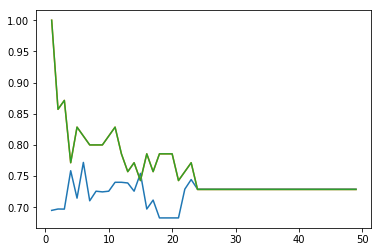

In [12]:
accuracys_ks.plot.line()
recalls_ks.plot.line()
precisions_ks.plot.line()
accuracys_ks.idxmax(),recalls_ks.idxmax(), precisions_ks.idxmax()

In [13]:
accuracys_ks[6], recalls_ks[6], precisions_ks[6]

(0.771941391941392, 0.81428571428571439, 0.81428571428571439)

Here is the report on the scores of accuracy, recall, and precision for a  KNeighborsClassifier with n_neighbors of 6.

**SUMMARIZE WHAT YOU DISCOVERED HERE.**

It appears that obviously a neighbor of just one will result in a score of 1 for recall and precision, whereas when I used recall, I got that 6 was the best k in order to get the best accuracy score. I do recognize that this could be because I used cross_val_score for accuracy and not the other. However I could not get cross_val_score to work for precision or recall.

## Question 2

What if we used TF-IDF on the top 50 words instead of the term frequencies? Repeat Question 1, using TF-IDF instead of TF. Which approach is better: TF-IDF or TF?

Reset the vectorizer to be the TFIDFVectorizer

In [14]:
# TYPE YOUR CODE HERE.

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(vocabulary=keys)
vec.fit(Known["text"])
X_train_dict = vec.transform(Known["text"])

In [15]:
ks=pd.Series(range(1,50))
ks.index=range(1,50)
accuracys_ks = ks.apply(get_accuracy_k)
recalls_ks = ks.apply(get_recall_k)
precisions_ks = ks.apply(get_precision_k)


(8, 1, 1)

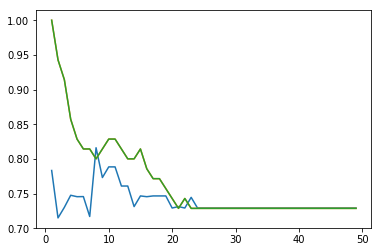

In [16]:
accuracys_ks.plot.line()
recalls_ks.plot.line()
precisions_ks.plot.line()
accuracys_ks.idxmax(),recalls_ks.idxmax(), precisions_ks.idxmax()

In [17]:
accuracys_ks[8], recalls_ks[8], precisions_ks[8]

(0.81604395604395619, 0.80000000000000016, 0.80000000000000016)

Here is the report on the scores of accuracy, recall, and precision for a  KNeighborsClassifier with n_neighbors of 8.

**SUMMARIZE WHAT YOU DISCOVERED HERE.**

Here we see similar trends as using countvectorizer, but this time, we get that a k = 8 is the most optimal k from our accuracy score.

## Question 3

Using the model that you determined to be best in Questions 1 and 2, fit a $k$-nearest neighbors model to all 70 documents with known authorship. Create a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) for your model that shows how often you predicted Hamilton, Jay, or Madison, and how often it actually was Hamilton, Jay, or Madison (on the training data, of course). 

From your confusion matrix, you should be able to calculate the (training) precision and recall of your model for predicting Hamilton. What is it?

In [18]:
# TYPE YOUR CODE HERE
vec = CountVectorizer(vocabulary=keys)
vec.fit(Known["text"])
X_train_dict = vec.transform(Known["text"])
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train_dict, Y_train)
Cpred=model.predict(X_train_dict)
Known["Cpred"] = Cpred

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Known["Author"], Known["Cpred"], labels=None, sample_weight=None)

array([[51,  0,  0],
       [ 5,  0,  0],
       [ 8,  0,  6]])

In [20]:
vec = TfidfVectorizer(vocabulary=keys)
vec.fit(Known["text"])
X_train_dict = vec.transform(Known["text"])
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train_dict, Y_train)
Tpred=model.predict(X_train_dict)
Known["Tpred"] = Tpred

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [21]:
confusion_matrix(Known["Author"], Known["Tpred"], labels=None, sample_weight=None)

array([[49,  0,  2],
       [ 5,  0,  0],
       [ 7,  0,  7]])

Hamilton is the first column, then Madison and Jay. This orienatation is folowed for the rows.

**SUMMARIZE WHAT YOU DISCOVERED HERE.**

Because there are so many papers written by Hamilton in the known papers, It appears that both models want to favor him as the wuthor of the unknown author papers. I do see however that neither models guessed correctly on Madison, but the model with the countvectorizer was able to correctly guess that Hamilton wrote the paper and got a few to correctly be guesses on Jay. Whereas the Model using tfidf missed 2 papers written by Hamilton and mistaken as Jay.

## Question 4

Finally, use the model you trained in Question 3 to predict the authorships of the 15 documents with unknown authors. Summarize what you find.

In [22]:

vec = CountVectorizer(vocabulary=keys)
vec.fit(Known["text"])
X_train_dict = vec.transform(Known["text"])
X_test_dict = vec.transform(Unknown["text"])
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train_dict, Y_train)
predictions=model.predict(X_test_dict)
Unknown["Author"] = predictions
Unknown

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,text,Author
17,To the People of the State of New York:\n\nAMO...,Hamilton
18,To the People of the State of New York:\n\nTHE...,Hamilton
19,To the People of the State of New York:\n\nTHE...,Hamilton
48,To the People of the State of New York:\n\nTHE...,Hamilton
49,To the People of the State of New York:\n\nIT ...,Hamilton
50,To the People of the State of New York:\n\nTO ...,Hamilton
51,To the People of the State of New York:\n\nFRO...,Hamilton
52,To the People of the State of New York:\n\nI S...,Hamilton
53,To the People of the State of New York:\n\nTHE...,Hamilton
54,To the People of the State of New York:\n\nTHE...,Hamilton


**SUMMARIZE WHAT YOU DISCOVERED HERE.**

All but one were predicted to be Hamilton. The last one which was article 62 was Madison. This makes sense as I said before, Because the majority of the known papers were written by Hamilton, It shows that our model would favor an unknown author to be Hamilton. I feel this dataset needs more papers written by the other two gentlemen, so that the authors will have an written an equal or close to equal amount of papers.

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF [to PolyLearn](https://polylearn.calpoly.edu/AY_2018-2019/mod/assign/view.php?id=336786).